# 1.2 Análise Bivariada

**Projeto:** Ligia Group Challenge 2026  
**Autor:** Grupo 17  
**Fase CRISP-DM:** Data Understanding  
**Objetivo:** Analisar relações entre pares de variáveis

## Importação de Bibliotecas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Carregamento dos Dados

In [7]:
data_path = Path('../data/raw/Sleep_health_and_lifestyle_dataset.csv')
df = pd.read_csv(data_path, sep=';')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

Dataset: 374 linhas x 13 colunas


## Matriz de Correlação

In [8]:
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


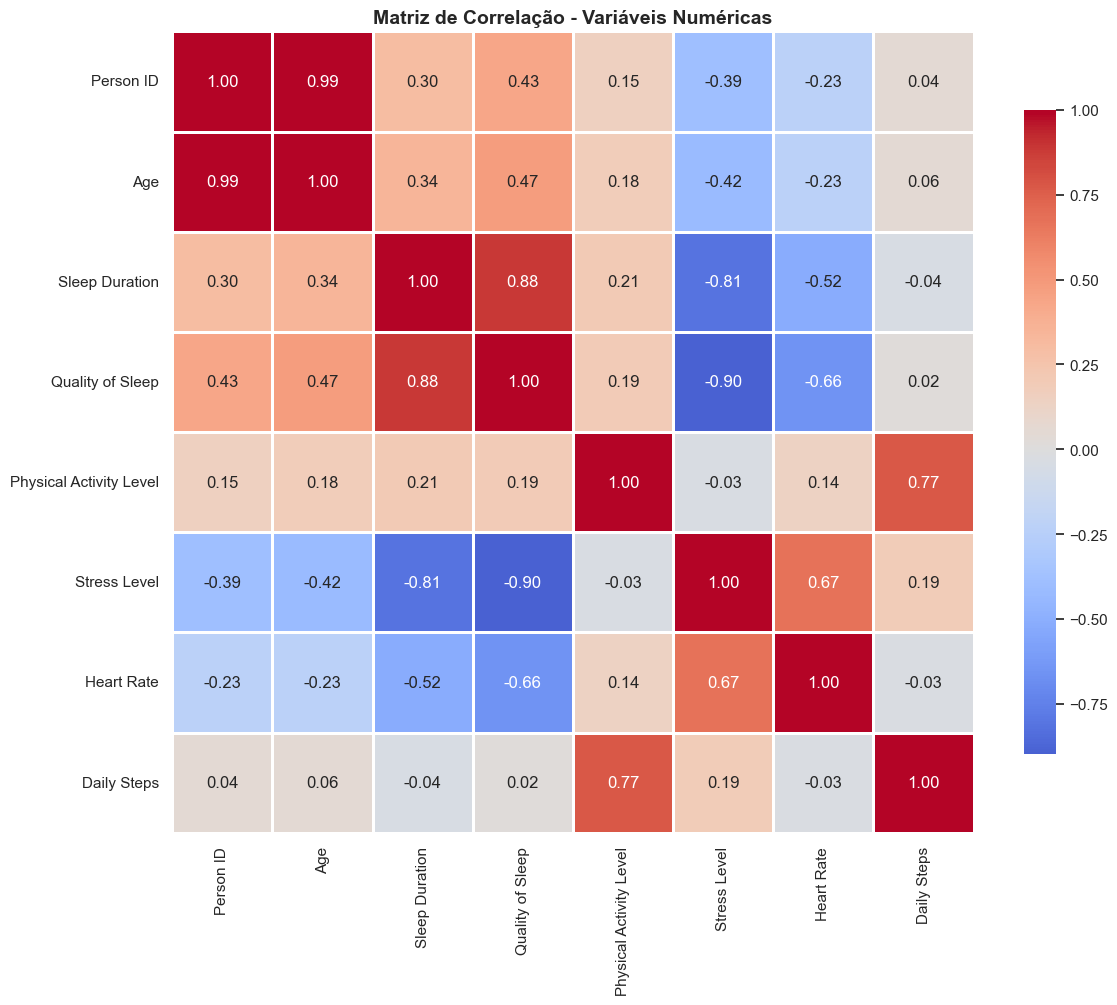

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [10]:
correlations_abs = correlation_matrix.abs().unstack()
correlations_sorted = correlations_abs.sort_values(ascending=False)
correlations_unique = correlations_sorted[correlations_sorted < 1]

print("Top 10 Correlações:")
print(correlations_unique.head(10))

Top 10 Correlações:
Age                      Person ID                  0.990516
Person ID                Age                        0.990516
Quality of Sleep         Stress Level               0.898752
Stress Level             Quality of Sleep           0.898752
Quality of Sleep         Sleep Duration             0.883213
Sleep Duration           Quality of Sleep           0.883213
Stress Level             Sleep Duration             0.811023
Sleep Duration           Stress Level               0.811023
Daily Steps              Physical Activity Level    0.772723
Physical Activity Level  Daily Steps                0.772723
dtype: float64
